In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [71]:
data = pd.read_csv("creditcard.csv", on_bad_lines='skip')

In [72]:
X = data.drop('Class', axis=1)
#X = X.interpolate()
y = data['Class']
#y = y.interpolate()

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size = 0.2)


In [73]:
len(X)

65499

In [74]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_trains, y_trains = smt.fit_resample(X_train, y_train)

In [75]:
logRegClassifier = LogisticRegression()
l = logRegClassifier.fit(X_trains, y_trains.values.ravel())

In [76]:
logRegClassifier.classes_
logRegClassifier.intercept_
logRegClassifier.coef_

array([[-7.52568564e-05,  2.91445551e-01, -5.71846841e-02,
        -5.43148164e-01,  6.04431060e-01,  1.00303151e-01,
        -1.98494329e-01, -2.07126722e-02, -7.03052640e-02,
        -5.27429277e-01, -5.20404730e-01,  1.75727522e-01,
        -2.98113450e-01, -3.72964280e-01, -1.18480995e+00,
         1.09691521e-01, -2.62060984e-01, -5.05569477e-01,
        -1.02282033e-01, -1.59237124e-01, -8.37347518e-03,
         1.44775889e-01,  4.13984728e-02, -1.00860516e-02,
        -5.26964319e-02,  3.55973150e-02, -2.60878301e-02,
        -2.35172305e-02,  4.79533251e-02, -7.59138989e-03]])

In [77]:
y_pred = logRegClassifier.predict(X_test)
logRegClassifier.score(X_test, y_test)

0.9789312977099237

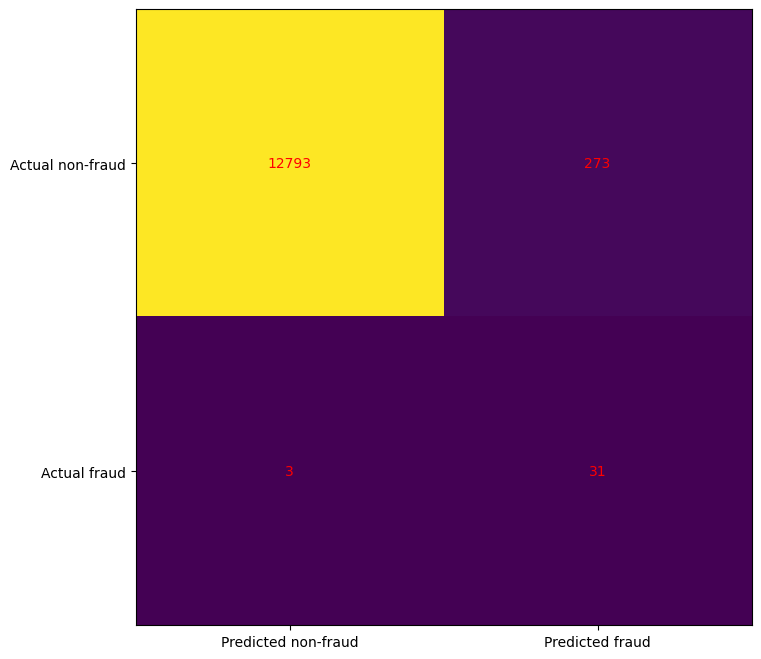

In [85]:
confusion_matrix(y_test, logRegClassifier.predict(X_test))

cm = confusion_matrix(y_test, logRegClassifier.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted non-fraud', 'Predicted fraud'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual non-fraud', 'Actual fraud'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [79]:
print(classification_report(y_test, logRegClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13066
           1       0.10      0.91      0.18        34

    accuracy                           0.98     13100
   macro avg       0.55      0.95      0.59     13100
weighted avg       1.00      0.98      0.99     13100



In [80]:
cvScore = cross_val_score(logRegClassifier, X=X_train, y= y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [81]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model

# evaluate model
scores = cross_val_score(logRegClassifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(scores)

[0.99828244 0.99885496 0.99675573 0.99770992 0.99866412 0.99770992
 0.99790076 0.99770992 0.99732824 0.9992365 ]


In [82]:
# Predict probability
y_prob_train = l.predict_proba(X_train)[:,1]
y_prob_test = l.predict_proba(X_test)[:,1]

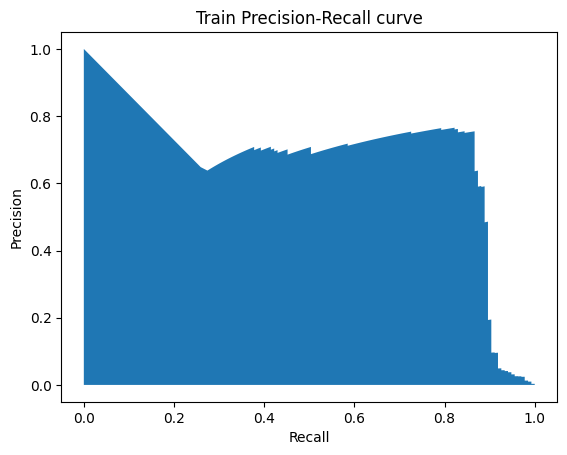

In [83]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [84]:
from sklearn.metrics import auc
pr_auc = auc(recall, precision)
print(pr_auc)

0.6705303562302493
